¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
import math

 # Cargar todas las librerías



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>
Comentario del estudiante:Listo importo tambien math.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Cargar datos

In [2]:
users=pd.read_csv('/datasets/megaline_users.csv')
calls=pd.read_csv('/datasets/megaline_calls.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')


## Preparar los datos

## Tarifas

In [3]:
plans.info()
# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
(plans)# Imprime una muestra de los datos para las tarifas



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Al hacer una revision a simple vista, sobre si cuento con los datos correctos para resolver el proyecto me parcate que tenia datos en megabites y el proyecto pide gb por lo que tenemos que cambiar los datos de la columna mb_per_month_included a gb.

## Corregir datos

In [5]:
plans['mb_per_month_included']=plans['mb_per_month_included']/1024
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Enriquecer los datos

## Usuarios/as

In [6]:
users.info()# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
users# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [43]:
#verifico que no haya duplicados con el metodo value_count(), que muestra el numero de veces que tenemos cada user_id().
users['user_id'].value_counts().sort_values()


1024    1
1027    1
1028    1
1029    1
1030    1
       ..
1495    1
1494    1
1493    1
1012    1
1023    1
Name: user_id, Length: 500, dtype: int64

 La columna reg_date esta con tipos de datos object, tenemos que cambiarla a la correspondiente.Ademas podemos observar que hay datos NaN , sin embargo estos estan en la columna de cuentas canceladas, por lo que es bueno que no haya cuentas canceladas para la empresa. Asi que no se eliminan esos datos NaN.
 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['reg_date']=pd.to_datetime(users['reg_date'],format ='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

In [10]:
users['month_of_reg']=users['reg_date'].dt.month
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_of_reg
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,2


## Llamadas

In [11]:
calls.info()# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
calls.head()# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [65]:
#verifico que no haya duplicados con el metodo value_counts(), que muestra el numero de veces que tenemos cada id
calls['id'].value_counts().sort_values()

1152119     1
1099197     1
1181832     1
1340114     1
1072669     1
           ..
1101196     1
122062      1
1077138     1
117943      1
13241057    1
Name: id, Length: 137735, dtype: int64

Puedo observar que la columna id tiene datos con guines bajos, hay que modificarlos , ademas de que el tipo de dato en call_date   esta como object, hay que pasarlo a datatime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['id']=calls['id'].str.replace('_','')
calls['call_date']=pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')
calls.info()
calls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,100093,1000,2018-12-27,8.52
1,1000145,1000,2018-12-27,13.66
2,1000247,1000,2018-12-27,14.48
3,1000309,1000,2018-12-28,5.76
4,1000380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499199,1499,2018-11-21,8.72
137731,1499200,1499,2018-10-20,10.89
137732,1499201,1499,2018-09-21,8.12
137733,1499202,1499,2018-10-10,0.37


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [49]:
calls['rounded_minutes']=np.ceil(calls['duration'])
calls['month']=calls['call_date'].dt.month
calls

,id,user_id,call_date,duration,rounded_minutes,month
0,100093,1000,2018-12-27,8.52,9.0,12
1,1000145,1000,2018-12-27,13.66,14.0,12
2,1000247,1000,2018-12-27,14.48,15.0,12
3,1000309,1000,2018-12-28,5.76,6.0,12
4,1000380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499199,1499,2018-11-21,8.72,9.0,11
137731,1499200,1499,2018-10-20,10.89,11.0,10
137732,1499201,1499,2018-09-21,8.12,9.0,9
137733,1499202,1499,2018-10-10,0.37,1.0,10


In [60]:
calls_filtered= calls[calls['duration']==0]
print(calls_filtered.head(60))

          id  user_id  call_date  duration  rounded_minutes  month
19     10014     1001 2018-12-05       0.0              0.0     12
25    100113     1001 2018-12-24       0.0              0.0     12
31    100130     1001 2018-10-17       0.0              0.0     10
32    100131     1001 2018-11-03       0.0              0.0     11
34    100135     1001 2018-12-21       0.0              0.0     12
39    100143     1001 2018-12-13       0.0              0.0     12
44    100152     1001 2018-11-23       0.0              0.0     11
45    100153     1001 2018-10-24       0.0              0.0     10
49    100160     1001 2018-12-16       0.0              0.0     12
61    100184     1001 2018-10-07       0.0              0.0     10
69    100198     1001 2018-11-06       0.0              0.0     11
74   1001109     1001 2018-10-27       0.0              0.0     10
75   1001110     1001 2018-08-16       0.0              0.0      8
76   1001112     1001 2018-10-28       0.0              0.0   

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>
filtre las llamadas con valor a cero y encontre que ciertos usuarios tienen muchos id de llamadas con duracion cero, por ejemplo el usuario 1001 tiene todas sus llamadas , que son 59 , con duracion 0

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Mensajes

In [15]:
messages.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
#
messages.head(10)# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [66]:
#verifico que no haya duplicados con el metodo value_counts(), que muestra el numero de veces que tenemos cada id
messages['id'].value_counts().sort_values()

1264449     1
1060304     1
118146      1
1362621     1
1114747     1
           ..
1229904     1
109943      1
1055285     1
122062      1
13241057    1
Name: id, Length: 76051, dtype: int64

La columna 'id' tiene valores con guines bajos, hay que cambiarlos, ademas la columna  'message_date' esta guardada como object, gat que cambiarla a dato tipo datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
messages['id']=messages['id'].str.replace('_','')
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26


### Enriquecer los datos

In [18]:
messages['month']=messages['message_date'].dt.month
messages

,id,user_id,message_date,month
0,1000125,1000,2018-12-27,12
1,1000160,1000,2018-12-31,12
2,1000223,1000,2018-12-31,12
3,1000251,1000,2018-12-27,12
4,1000255,1000,2018-12-26,12
...,...,...,...,...
76046,1497526,1497,2018-12-24,12
76047,1497536,1497,2018-12-24,12
76048,1497547,1497,2018-12-31,12
76049,1497558,1497,2018-12-24,12


## Internet

In [19]:
internet.info()# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
internet.head(10)# Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [72]:
#verifico que no haya duplicados con el metodo value_counts(), que muestra el numero de veces que tenemos cada id
internet['id'].value_counts().sort_values()

1133225    1
1332260    1
1258497    1
131176     1
138579     1
          ..
124294     1
139791     1
1332301    1
101611     1
1280382    1
Name: id, Length: 104825, dtype: int64

La columna 'id' tiene valores con guines bajos, hay que cambiarlos, ademas la columna 'session_date' esta guardada como object, hay que cambiarla a dato tipo datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
internet['id']=internet['id'].str.replace('_','')
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')


internet

,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,89.86
1,1000204,1000,2018-12-31,0.00
2,1000379,1000,2018-12-28,660.40
3,1000413,1000,2018-12-26,270.99
4,1000442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499215,1499,2018-10-20,218.06
104821,1499216,1499,2018-12-30,304.72
104822,1499217,1499,2018-09-22,292.75
104823,1499218,1499,2018-12-07,0.00


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
internet['month']=internet['session_date'].dt.month
internet['gb_used']=internet['mb_used']/1024

internet

,id,user_id,session_date,mb_used,month,gb_used
0,100013,1000,2018-12-29,89.86,12,0.087754
1,1000204,1000,2018-12-31,0.00,12,0.000000
2,1000379,1000,2018-12-28,660.40,12,0.644922
3,1000413,1000,2018-12-26,270.99,12,0.264639
4,1000442,1000,2018-12-27,880.22,12,0.859590
...,...,...,...,...,...,...
104820,1499215,1499,2018-10-20,218.06,10,0.212949
104821,1499216,1499,2018-12-30,304.72,12,0.297578
104822,1499217,1499,2018-09-22,292.75,9,0.285889
104823,1499218,1499,2018-12-07,0.00,12,0.000000


## Estudiar las condiciones de las tarifas

In [23]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [73]:
pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                            values=['duration'],
                            aggfunc=['sum','count']).reset_index()

pivot_calls
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



,user_id,month,sum,count
,,,duration,duration
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>
Comentario de estudiante: Se  cambia el group by por un pivot table, para un mejor entendimiento y organizacion de la tabla agrupada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

In [74]:
messages_by_month= messages.groupby(['user_id','month']).agg(total_sms =('id','count')).reset_index()
messages_by_month# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_by_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    1806 non-null   int64
 1   month      1806 non-null   int64
 2   total_sms  1806 non-null   int64
dtypes: int64(3)
memory usage: 42.5 KB


In [26]:
internet_by_month=internet.groupby(['user_id','month']).agg(total_gb =('gb_used','sum')).reset_index()
internet_by_month['total_gb']=np.ceil(internet_by_month['total_gb'])
internet_by_month# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



,user_id,month,total_gb
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [75]:
combinated_data= pd.merge(calls_by_month,internet_by_month,
                  on= ['user_id','month'],
                  how='outer'
                 )
combinated_data=combinated_data.merge(messages_by_month,
                  on= ['user_id','month'],
                  how='outer'
                 )
fill_columns=['total_minutes','total_calls','total_gb','total_sms']# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
for fill in fill_columns:
    combinated_data[fill].fillna(0, inplace=True)
print(combinated_data.isna().sum())



user_id          0
month            0
total_calls      0
total_minutes    0
total_gb         0
total_sms        0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [76]:
all_info=combinated_data.merge(users[['user_id','plan','city']],
                       on='user_id')

all_info= all_info.merge(plans,left_on='plan',right_on='plan_name') 
all_info# Añade la información de la tarifa



,user_id,month,total_calls,total_minutes,total_gb,total_sms,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,116.83,2.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
1,1006,11,2.0,9.32,3.0,15.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
2,1006,12,9.0,54.79,32.0,139.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
3,1008,10,71.0,450.21,17.0,21.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
4,1008,11,63.0,422.81,24.0,37.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30.0,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.00,42.0,62.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15.0,500,20,10,0.03,0.03,surf
2289,1194,12,0.0,0.00,31.0,56.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15.0,500,20,10,0.03,0.03,surf
2290,1349,10,0.0,0.00,13.0,76.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03,surf
2291,1349,11,0.0,0.00,17.0,72.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15.0,500,20,10,0.03,0.03,surf


In [77]:
all_info['internet_extra_pay']=all_info['total_gb']-all_info['mb_per_month_included']
all_info['internet_extra_pay']=np.where(all_info['internet_extra_pay']<0,0,all_info['internet_extra_pay'])
all_info['internet_extra_pay']=all_info['internet_extra_pay']*all_info['usd_per_gb']
all_info['calls_extra_charge']=all_info['total_minutes']-all_info['minutes_included']# Calcula el ingreso mensual para cada usuario
all_info['calls_extra_charge']=np.where(all_info['calls_extra_charge']<0,0,all_info['calls_extra_charge'])
all_info['calls_extra_charge']=all_info['calls_extra_charge']*all_info['usd_per_minute']
all_info['messages_extra_charge']=all_info['total_sms']-all_info['messages_included']
all_info['messages_extra_charge']=np.where(all_info['messages_extra_charge']<0,0,all_info['messages_extra_charge'])
all_info['messages_extra_charge']=all_info['messages_extra_charge']*all_info['usd_per_message']
all_info['income']=all_info['messages_extra_charge']+all_info['calls_extra_charge']+all_info['internet_extra_pay']+all_info['usd_monthly_pay']
all_info
final_table_charge=all_info[['user_id','month','plan','city','income','total_minutes','total_gb','total_sms','usd_monthly_pay']]
final_table_charge

,user_id,month,plan,city,income,total_minutes,total_gb,total_sms,usd_monthly_pay
0,1000,12,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00,116.83,2.0,11.0,70
1,1006,11,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",70.00,9.32,3.0,15.0,70
2,1006,12,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",84.00,54.79,32.0,139.0,70
3,1008,10,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",70.00,450.21,17.0,21.0,70
4,1008,11,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",70.00,422.81,24.0,37.0,70
...,...,...,...,...,...,...,...,...,...
2288,1194,11,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",290.36,0.00,42.0,62.0,20
2289,1194,12,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",180.18,0.00,31.0,56.0,20
2290,1349,10,surf,"Boston-Cambridge-Newton, MA-NH MSA",20.78,0.00,13.0,76.0,20
2291,1349,11,surf,"Boston-Cambridge-Newton, MA-NH MSA",40.66,0.00,17.0,72.0,20


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

Text(0.5, 1.0, 'El total de minutos por mes no parece diferir mucho entre los dos planes')

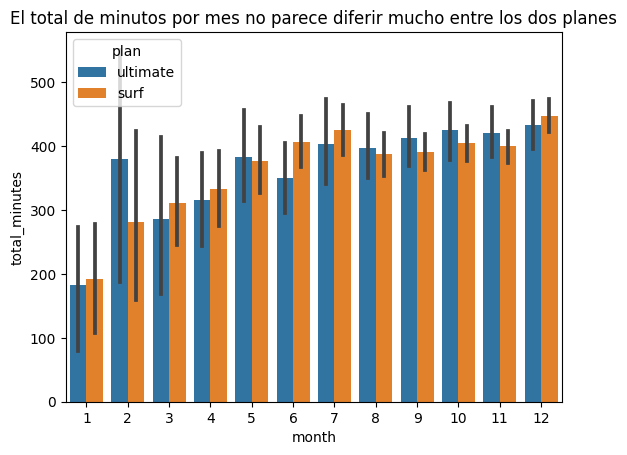

In [30]:

sns.barplot(data=final_table_charge,x='month',y='total_minutes',hue='plan').set_title('El total de minutos por mes no parece diferir mucho entre los dos planes')




Text(0.5, 1.0, 'La frecuencia de minutos por mes no parece diferir mucho entre los dos planes')

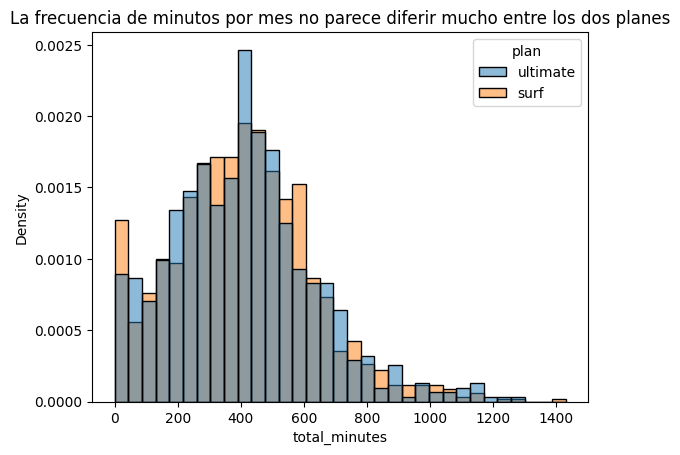

In [31]:
sns.histplot(data=final_table_charge, x="total_minutes",hue='plan',stat='density',common_norm=False).set_title('La frecuencia de minutos por mes no parece diferir mucho entre los dos planes')# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



In [79]:
mean_calls=final_table_charge.groupby('plan')['total_minutes'].mean()
var_calls=final_table_charge.groupby('plan')['total_minutes'].var()
print(mean_calls,var_calls)
# Calcula la media y la varianza de la duración mensual de llamadas.



plan
surf        404.762390
ultimate    406.193083
Name: total_minutes, dtype: float64 plan
surf        49135.104891
ultimate    51640.971402
Name: total_minutes, dtype: float64


Text(0.5, 1.0, 'La distribucion de la duracion mensual de llamadasn no parece tener una diferencia importante')

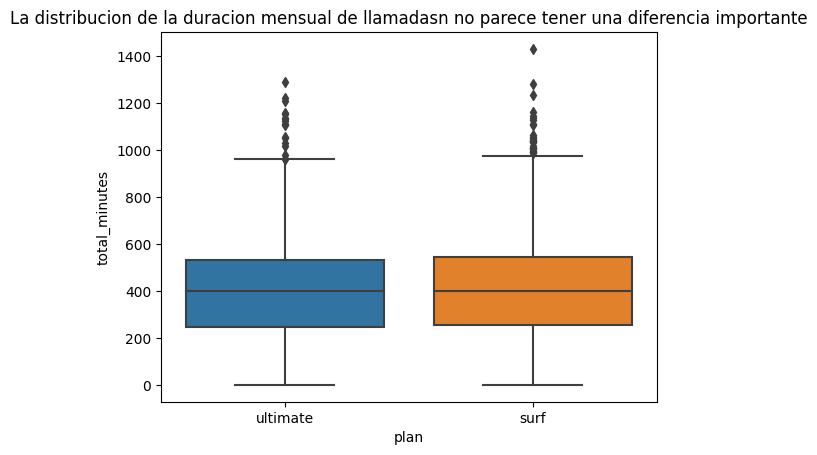

In [78]:
#Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
#un boxplot por cada plan
sns.boxplot(data=final_table_charge, x="plan", y="total_minutes").set_title('La distribucion de la duracion mensual de llamadasn no parece tener una diferencia importante')



### Mensajes

Text(0.5, 1.0, 'Los usuarios realizan mayor numero de mensajes en el plan Ultimate')

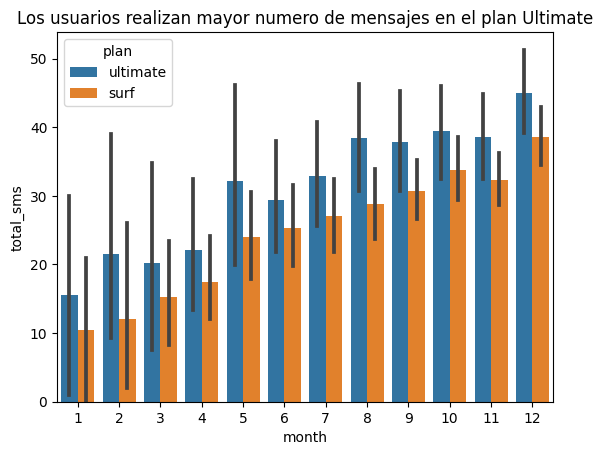

In [34]:
sns.barplot(data=final_table_charge,x='month',y='total_sms',hue='plan').set_title('Los usuarios realizan mayor numero de mensajes en el plan Ultimate')# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



In [35]:
final_table_charge

,user_id,month,plan,city,income,total_minutes,total_gb,total_sms,usd_monthly_pay
0,1000,12,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00,116.83,2.0,11.0,70
1,1006,11,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",70.00,9.32,3.0,15.0,70
2,1006,12,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",84.00,54.79,32.0,139.0,70
3,1008,10,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",70.00,450.21,17.0,21.0,70
4,1008,11,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",70.00,422.81,24.0,37.0,70
...,...,...,...,...,...,...,...,...,...
2288,1194,11,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",290.36,0.00,42.0,62.0,20
2289,1194,12,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",180.18,0.00,31.0,56.0,20
2290,1349,10,surf,"Boston-Cambridge-Newton, MA-NH MSA",20.78,0.00,13.0,76.0,20
2291,1349,11,surf,"Boston-Cambridge-Newton, MA-NH MSA",40.66,0.00,17.0,72.0,20


<AxesSubplot:xlabel='month', ylabel='total_gb'>

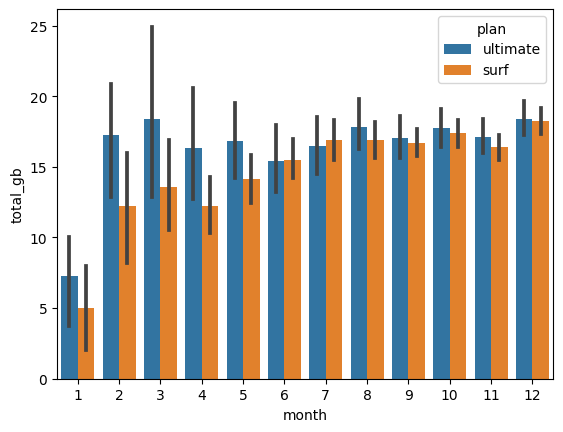

In [36]:
sns.barplot(data=final_table_charge,x='month',y='total_gb',hue='plan')# Compara la cantidad de tráfico de Internet consumido por usuarios por plan



### Internet

Text(0.5, 1.0, 'Diferencia entre el trafico de datos en gb por plan')

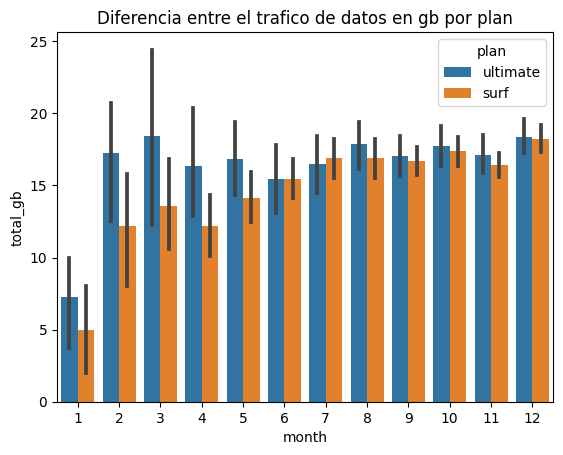

In [37]:
sns.barplot(data=final_table_charge,x='month',y='total_gb',hue='plan').set_title('Diferencia entre el trafico de datos en gb por plan')

 Parece ser que el trafico de internet varia en muy poco , siendo ligeramente mas alto en el plan Ultimate

## Ingreso

In [38]:
display(final_table_charge[['user_id','income','month']])

,user_id,income,month
0,1000,70.00,12
1,1006,70.00,11
2,1006,84.00,12
3,1008,70.00,10
4,1008,70.00,11
...,...,...,...
2288,1194,290.36,11
2289,1194,180.18,12
2290,1349,20.78,10
2291,1349,40.66,11


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [80]:
from scipy.stats import ttest_ind
alpha=0.05
t,pvalue=ttest_ind(
    final_table_charge.query("plan=='surf'")['income'],
    final_table_charge.query("plan=='ultimate'")['income'],
    equal_var=False
)

if pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos Rechazar la Hipotesis nula')
    



# Prueba las hipótesis



Rechazamos la hipotesis nula


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>
Comentario del Estudiante: Se adiciona equal_var=False a la funcion.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

Rechazamos la Hipótesis nula debido a que los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf  so estadisticamente diferentes.
El umbral o alfa es de 0.5 y el pvalue nos da 9.342071816297584e-09 por lo tanto,
la hipotesis nula se puede rechazar.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


# Prueba las hipótesis
## ESTABLESCO LAS HIPOTESIS
##### Hipótesis nula: El ingreso promedio de los usuarios de NY-NJ es igual a la de los usiarios de otras regiones.
##### Hipótesis alternativa:El ingreso promedio de los usuarios de NY-NJ es estadisticamente diferente a la de los usuarios de otras regiones.




In [83]:
#income_NY=final_table_charge[final_table_charge['total_to_pay']== 'Nueva York-Nueva Jersey'
final_table_charge['city'].unique()
#final_table_charge.query("city != 'Nueva York-Nueva Jersey'")['income']

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Grand Rapids-Ken

In [84]:
final_table_charge[final_table_charge['city'].str.contains('New York')]['city'].unique()
ny_nj_zone=['New York-Newark-Jersey City, NY-NJ-PA MSA']
print(ny_nj_zone)

['New York-Newark-Jersey City, NY-NJ-PA MSA']


In [85]:
#Ahora si realizo el ttest o prueba de hipótesis
alpha=0.05
t,pvalue=ttest_ind(
    final_table_charge[final_table_charge['city'].isin(ny_nj_zone)]['income'],
    final_table_charge[~final_table_charge['city'].isin(ny_nj_zone)]['income'],
    equal_var=False
    )
if pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No podemos Rechazar la Hipotesis nula')

Se rechaza la hipótesis nula


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>
Comentario de estuciante:Se adiciona equal_var=False a la funcion.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos

*  verificar las  pruebas de hipótesis
</div>
Comentarios del estudiante: Se realizaron algunos cambios en las recomendaciones y se verificaron correctamente las pruebas de Hipotesis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>